# Summary

* For this analysis, dataset of 249 mice who were identified with SCC tumours and received treatment with a range of drug regimens were provided. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

* Initially the data provided was cleaned and prepared by dropping the duplicate values. Than a summary statistics dafaframe was created.
    
* A bar chart was plotted to show the total number of time points for all mice tested for each drug regimen throughout the study and a pie chart was plotted to show the distribution of female versus male mice in the study.
    
* Any potential outliers across all four treatment regimens were identified by consodering the tumour volume at the last timepoint for each mouse and a box plot was plotted to show the distribution of the final tumour volume for all the mice in each treatment group.
    
* The mouse ID s185 was chosen that was treated with the Capomulin drug and a a line plot was plotted to show trend of the tumour volume versus time point for s185.
    
* A scatter plot was plotted that shows the distribution of tumour volume versus mouse weight for the Capomulin treatment regimen.
    
* The correlation coefficient and r-squared value between mouse weight and average tumour volume for the Capomulin treatment was calculated and a linear regression model was plotted.

# Conclusion

* There is a positive correlation between the mouse weight and the average tumour volume for the mice treated with the drug Capomulin which indicates that as the weight of the mouse increases the tumour volume identified also increases.

* The distribution of male and female mice considered for this study is almost equal and hence it can be said to be a fair comparison.

* Only one outlier value could be found among the data set which indicates that the dataset provided is not contaminated.

In [1]:
# import dependencies

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# load and read csv files

mouse_metadata = os.path.join("Resources", "Mouse_metadata.csv")
study_results = os.path.join("Resources", "Study_results.csv")

mouse_df = pd.read_csv(mouse_metadata)
study_df = pd.read_csv(study_results)

# merge into single dataframe

combined_df = pd.merge(mouse_df, study_df, how = "outer", on = "Mouse ID")

combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Count the number of mice in the DataFrame

count = combined_df["Mouse ID"].count()
print(f"Number of mice in the study are {count}.")

Number of mice in the study are 1893.


In [4]:
# Getting the duplicate mice by ID number for Mouse ID and Timepoint

duplicate_df = combined_df.loc[combined_df.duplicated(subset = ["Mouse ID", "Timepoint"])]
duplicate_df["Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
# Get all the data for the duplicate Mouse ID

duplicate_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]

In [6]:
# Create a clean DataFrame by dropping the duplicate mice by its Mouse ID and Timepoint

cleaned_df = combined_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Count the number of mice in the clean DataFrame

count_clean = cleaned_df["Mouse ID"].count()
print(f"Number of mice in the study are {count_clean}.")

Number of mice in the study are 1888.


In [8]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumour volume for each regimen

mean_tumour = round(cleaned_df.groupby("Drug Regimen")["Tumour Volume (mm3)"].mean(),2)

median_tumour = round(cleaned_df.groupby("Drug Regimen")["Tumour Volume (mm3)"].median(), 2)

variance_tumour = round(cleaned_df.groupby("Drug Regimen")["Tumour Volume (mm3)"].var(), 2)

std_tumour = round(cleaned_df.groupby("Drug Regimen")["Tumour Volume (mm3)"].std(), 2)

sem_tumour = round(cleaned_df.groupby("Drug Regimen")["Tumour Volume (mm3)"].sem(), 2)

# Create a summary stats dataframe

summary_stats_df = pd.DataFrame({"Mean Tumour Volume": mean_tumour, "Median Tumour Volume": median_tumour,
                              "Variance Tumour Volume": variance_tumour, "Standard Deviation Tumour Volume": std_tumour,
                              "SEM Tumour Volume": sem_tumour})
summary_stats_df

,Mean Tumour Volume,Median Tumour Volume,Variance Tumour Volume,Standard Deviation Tumour Volume,SEM Tumour Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


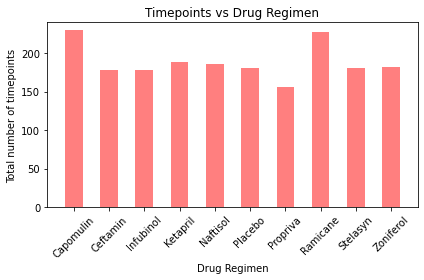

In [9]:
# create a bar chart showing the total number of timepoints for all mice tested for each drug regimen using Pandas

timepoints = cleaned_df.groupby("Drug Regimen")["Timepoint"].count()

timepoints_pdplt = timepoints.plot(kind = "bar", title = "Timepoints vs Drug Regimen", color = "red", alpha = 0.5, legend = False)

timepoints_pdplt.set_xlabel("Drug Regimen")
timepoints_pdplt.set_ylabel("Total number of timepoints")

timepoints_pdplt.set_xlim(-0.75, timepoints.count() - 0.25)
timepoints_pdplt.set_ylim(0, timepoints.max() + 10)

plt.xticks(rotation = 45)

plt.tight_layout()

plt.savefig("Images/Timepoints vs Drug Regimen (Pandas).png")

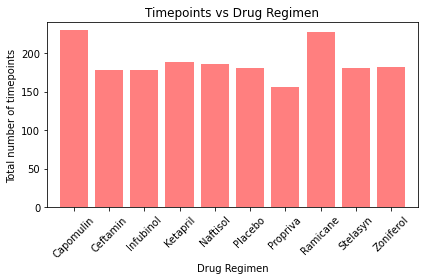

In [22]:
# create a bar chart showing the total number of timepoints for all mice tested for each drug regimen using matplotlib

x_axis = np.arange(len(timepoints))
y_axis = timepoints
y_axis_index_values = timepoints.index.values

plt.bar(x_axis, y_axis, color = "red", alpha = 0.5, align = "center")

plt.title("Timepoints vs Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of timepoints")

tick_locations = [number for number in x_axis]
plt.xticks(tick_locations, y_axis_index_values)
plt.xticks(rotation = 45)

plt.xlim(-0.75, len(x_axis) - 0.25)
plt.ylim(0, max(y_axis) + 10)

plt.tight_layout()

plt.savefig("Images/Timepoints vs Drug Regimen (matplotlib).png")

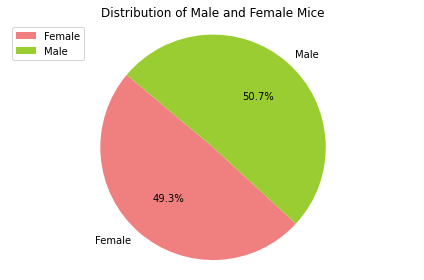

In [23]:
# create a pie chart showing the distribution of female versus male mice using pandas

mice_sex = cleaned_df.groupby("Sex")["Mouse ID"].count()

labels = mice_sex.index.values
colours = ["lightcoral","yellowgreen"]

mice_sex_pdplt = mice_sex.plot(kind = "pie", title = "Distribution of Male and Female Mice", colors = colours, autopct = "%1.1f%%", startangle = 140)

plt.ylabel("")

plt.legend(labels, loc = "upper left")
plt.axis("equal")

plt.tight_layout()

plt.savefig("Images/Distribution of Male and Female Mice (Pandas).png")

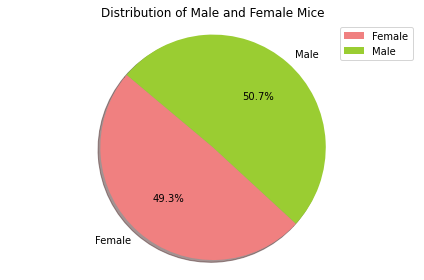

In [24]:
# create a pie chart showing the distribution of female versus male mice using matplotlib

mice_sex = cleaned_df.groupby("Sex")["Mouse ID"].count()

labels = mice_sex.index.values
colours = ["lightcoral","yellowgreen"]
explode = (0,0)

plt.pie(mice_sex, explode = explode, labels = labels, colors = colours, autopct = "%1.1f%%", shadow = True, startangle = 140)

plt.title("Distribution of Male and Female Mice")

plt.legend(labels, loc = "best")
plt.axis("equal")

plt.tight_layout()

plt.savefig("Images/Distribution of Male and Female Mice (matplotlib).png")

In [13]:
# create a dataframe for the last timepoint for each Mouse ID and reset the index

max_timepoint = cleaned_df.groupby("Mouse ID")["Timepoint"].max()

max_timepoint_df = pd.DataFrame(max_timepoint)
max_timepoint_df.reset_index()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [14]:
# merge dataframe for last timepoint with the original dataframe to get the tumour volume at the last timepoint

combined_df = pd.merge(max_timepoint_df, cleaned_df, how = "left", on = ["Mouse ID", "Timepoint"])
combined_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# create tumour volume at last timepoints for drugs Capomulin, Ramicane, Infubinol, and Ceftamin

drug_group = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumour_volume = []

for drug in drug_group:
    
    tumour_volume_data = combined_df.loc[combined_df["Drug Regimen"] == drug]["Tumour Volume (mm3)"]
    
    tumour_volume.append(tumour_volume_data)

In [16]:
# calculate the IQR and outliers value for drugs Capomulin, Ramicane, Infubinol, and Ceftamin

for x in np.arange(0,4,1):
    
    quartiles = tumour_volume[x].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The interquartile range for {drug_group[x]} is {round(iqr,2)}.")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"For {drug_group[x]}, the values below {round(lower_bound,2)} and above {round(upper_bound,2)} could be outliers.\n")

The interquartile range for Capomulin is 7.78.
For Capomulin, the values below 20.7 and above 51.83 could be outliers.

The interquartile range for Ramicane is 9.1.
For Ramicane, the values below 17.91 and above 54.31 could be outliers.

The interquartile range for Infubinol is 11.48.
For Infubinol, the values below 36.83 and above 82.74 could be outliers.

The interquartile range for Ceftamin is 15.58.
For Ceftamin, the values below 25.36 and above 87.67 could be outliers.



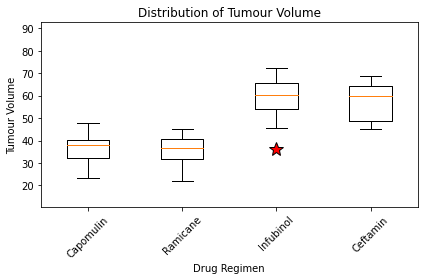

In [25]:
# create a boxplot that shows the distribution of the final tumour volume for all the mice in each treatment group

x_axis = np.arange(len(drug_group))

plt.boxplot(tumour_volume, flierprops={"marker": "*", "markersize": 15, "markerfacecolor": "red"})

plt.title("Distribution of Tumour Volume")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumour Volume")

tick_locations = [number+1 for number in x_axis]
plt.xticks(tick_locations, drug_group)
plt.xticks(rotation = 45)

plt.ylim(lower_bound - 15, upper_bound + 5)

plt.tight_layout()

plt.savefig("Images/Distribution of Tumour Volume.png")

In [18]:
# create a dataframe with details for the Capomulin drug

capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]
capomulin_df.reset_index(drop = True)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,0,45.000000,0
1,s185,Capomulin,Female,3,17,5,43.878496,0
2,s185,Capomulin,Female,3,17,10,37.614948,0
3,s185,Capomulin,Female,3,17,15,38.177232,0
4,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
225,i557,Capomulin,Female,1,24,45,47.685963,1
226,r157,Capomulin,Male,22,25,0,45.000000,0
227,r157,Capomulin,Male,22,25,5,45.597064,0
228,r157,Capomulin,Male,22,25,10,46.059608,0


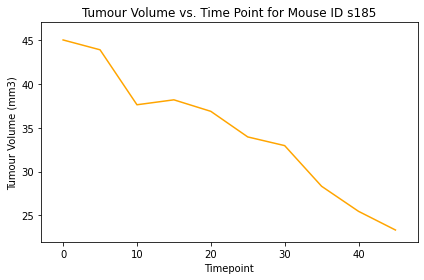

In [26]:
# selecting Mouse ID == s185
# calculate tumour volume and timepoint for creating a line plot for s185

x_axis = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185", ["Timepoint"]]
y_axis = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185", ["Tumour Volume (mm3)"]]

plt.plot(x_axis, y_axis, color = "orange")

plt.title("Tumour Volume vs. Time Point for Mouse ID s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumour Volume (mm3)")

plt.xlim(-3, x_axis["Timepoint"].max() + 3)
plt.ylim(22, y_axis["Tumour Volume (mm3)"].max() + 2)

plt.tight_layout()

plt.savefig("Images/Tumour Volume vs. Time Point for Mouse ID s185.png")

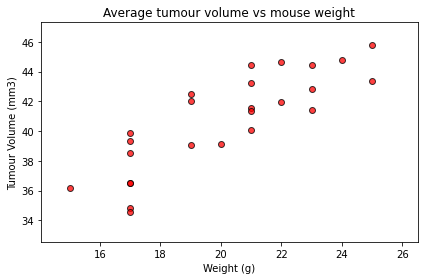

In [27]:
# create a scatter plot that shows average tumour volume vs. mouse weight for the Capomulin wrt Mouse ID

weight_x = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
tumour_volume_y = capomulin_df.groupby("Mouse ID")["Tumour Volume (mm3)"].mean()

plt.scatter(weight_x, tumour_volume_y, marker = "o", facecolors = "red", edgecolors = "black", alpha = 0.75)

plt.title("Average tumour volume vs mouse weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumour Volume (mm3)")

plt.xlim(weight_x.min() - 0.95, weight_x.max() + 1.5)
plt.ylim(tumour_volume_y.min() - 2, tumour_volume_y.max() + 1.5)

plt.tight_layout()

plt.savefig("Images/Average tumour volume vs mouse weight.png")

The correlation coefficeint between mouse weight and average tumour volume is 0.84.
The r-squared is: 0.71.
Line equation: y = 0.95x + 21.55


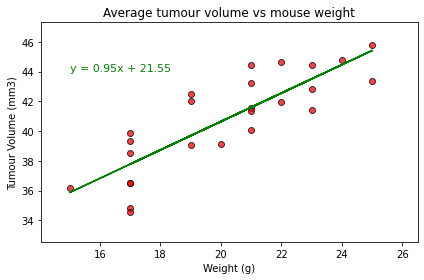

In [28]:
# calculate coefficient and linear regression model for mouse weight and average tumour volume for the Capomulin drug

correlation = st.pearsonr(weight_x, tumour_volume_y)
print(f"The correlation coefficeint between mouse weight and average tumour volume is {round(correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_x, tumour_volume_y)
print(f"The r-squared is: {round(rvalue**2,2)}.")

regress_values = weight_x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Line equation: {line_eq}")

plt.scatter(weight_x, tumour_volume_y, marker = "o", facecolors = "red", edgecolors = "black", alpha = 0.75)

plt.plot(weight_x, regress_values, color = "green")

plt.annotate(line_eq,(15,44),fontsize = 11,color = "green", alpha = 3)

plt.title("Average tumour volume vs mouse weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumour Volume (mm3)")

plt.xlim(weight_x.min() - 0.95, weight_x.max() + 1.5)
plt.ylim(tumour_volume_y.min() - 2, tumour_volume_y.max() + 1.5)

plt.tight_layout()

plt.savefig("Images/Average tumour volume vs mouse weight regression model.png")